In [8]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('marketing_campaign.csv',sep='\t')

In [9]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [10]:
col = data.isnull().sum() 
col = col[col>0]
print(f'Column: {col.index[0]} having {col.values[0]} missing values')

Column: Income having 24 missing values


In [11]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df=data
df['MntTotal'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['AverageCheck'] = round((df['MntTotal'] / df['NumAllPurchases']), 1)
df['ShareDealsPurchases'] = round((df['NumDealsPurchases'] / df['NumAllPurchases']) * 100, 1)
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [14]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

re_marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}

df['Marital_Status'] = df['Marital_Status'].map(re_marital)
df['Family_size'] = 0

for i in range(len(df)):
    
    if df['Marital_Status'][i] == 'In relationship':
        df['Family_size'][i] = 2 + df['Kids'][i]
    else:
        df['Family_size'][i] = 1 + df['Kids'][i]

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer'].max(), df['Dt_Customer'].min()

(Timestamp('2014-06-29 00:00:00'), Timestamp('2012-07-30 00:00:00'))

In [16]:
df['Age'] = 2014 - df['Year_Birth']
df['Collected'] = '2014-12-07'
df['Collected'] = pd.to_datetime(df['Collected'])
df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days

In [17]:
df['MntTotal'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['AverageCheck'] = round((df['MntTotal'] / df['NumAllPurchases']), 1)
df['ShareDealsPurchases'] = round((df['NumDealsPurchases'] / df['NumAllPurchases']) * 100, 1)
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [18]:
df = df.query("NumAllPurchases != 0")

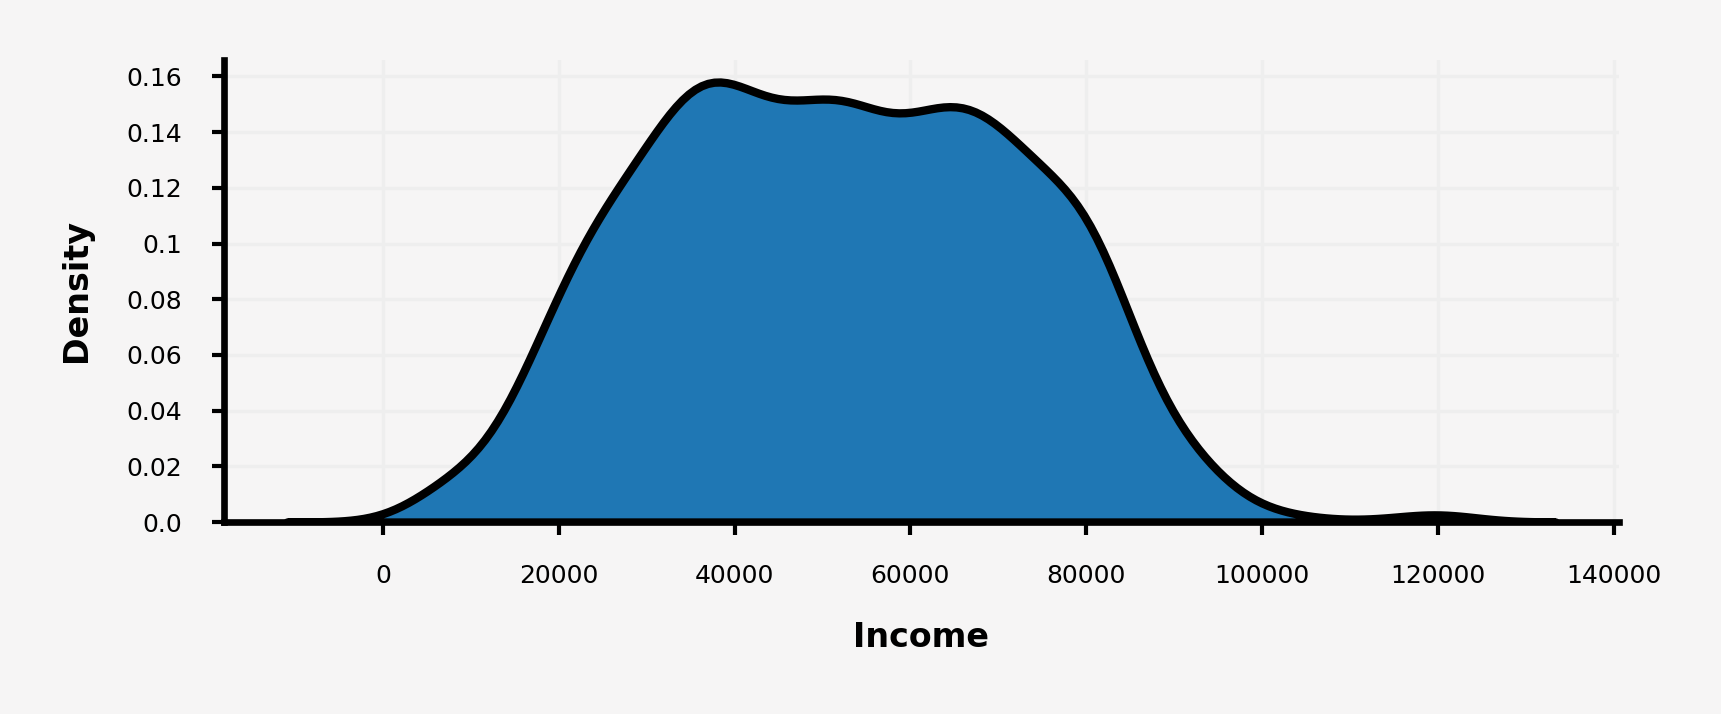

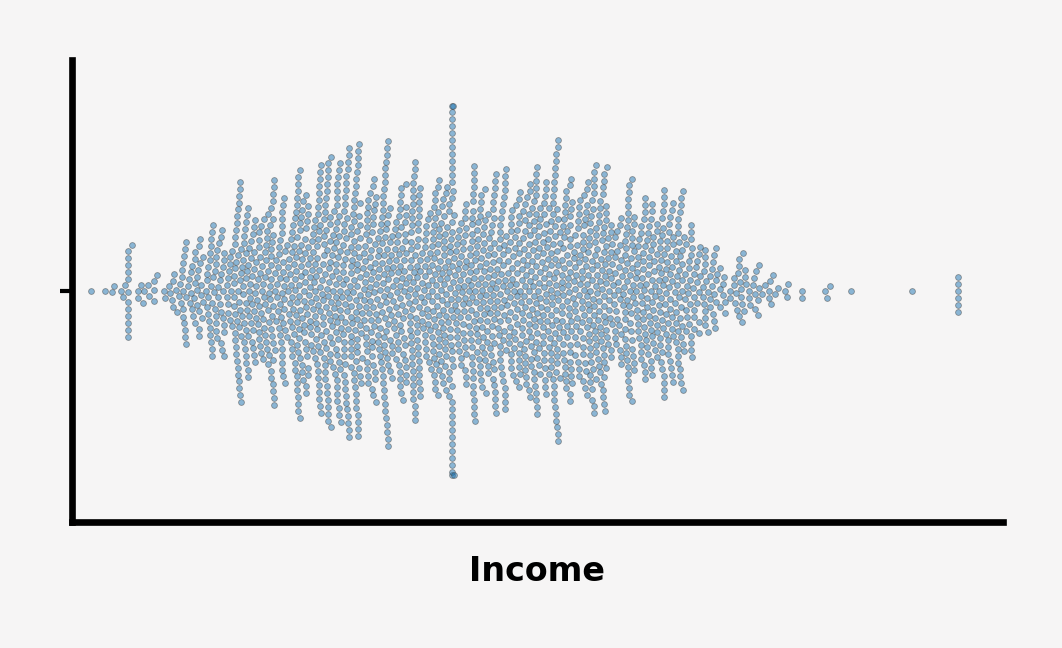

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def setup_plot(w=1, h=1, dpi=600, X_label='', y_label='', PAL=sns.color_palette()):
    # Setting plot theme
    plt.rcParams['figure.dpi'] = dpi
    fig, ax = plt.subplots(figsize=(w, h), facecolor='#f6f5f5')
    sns.set_palette(PAL)
    
    # Customizing the axis
    ax.set_facecolor('#f6f5f5')
    ax.set_xlabel(X_label, fontsize=4, weight='bold')
    ax.set_ylabel(y_label, fontsize=4, weight='bold')
    ax.tick_params(labelsize=3, width=0.5, length=1.5)
    ax.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    # Remove right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return ax

# Assuming df is your dataframe and 'Income' is the column you want to plot
plot1 = sns.kdeplot(df.Income, ax=setup_plot(w=3), zorder=2, fill=True, alpha=1, ec='black')
plot1.ticklabel_format(useOffset=False, style='plain')
y_label = np.arange(0, 0.18, 0.02)
plot1.set_yticklabels(y_label)

plot3 = sns.boxplot(df.Income, ax=setup_plot(w=2), zorder=2, linewidth=0.7)
sns.swarmplot(x='Income', ax=plot3, data=df, size=0.7, linewidth=0.1, alpha=0.5, zorder=3)

plt.show()


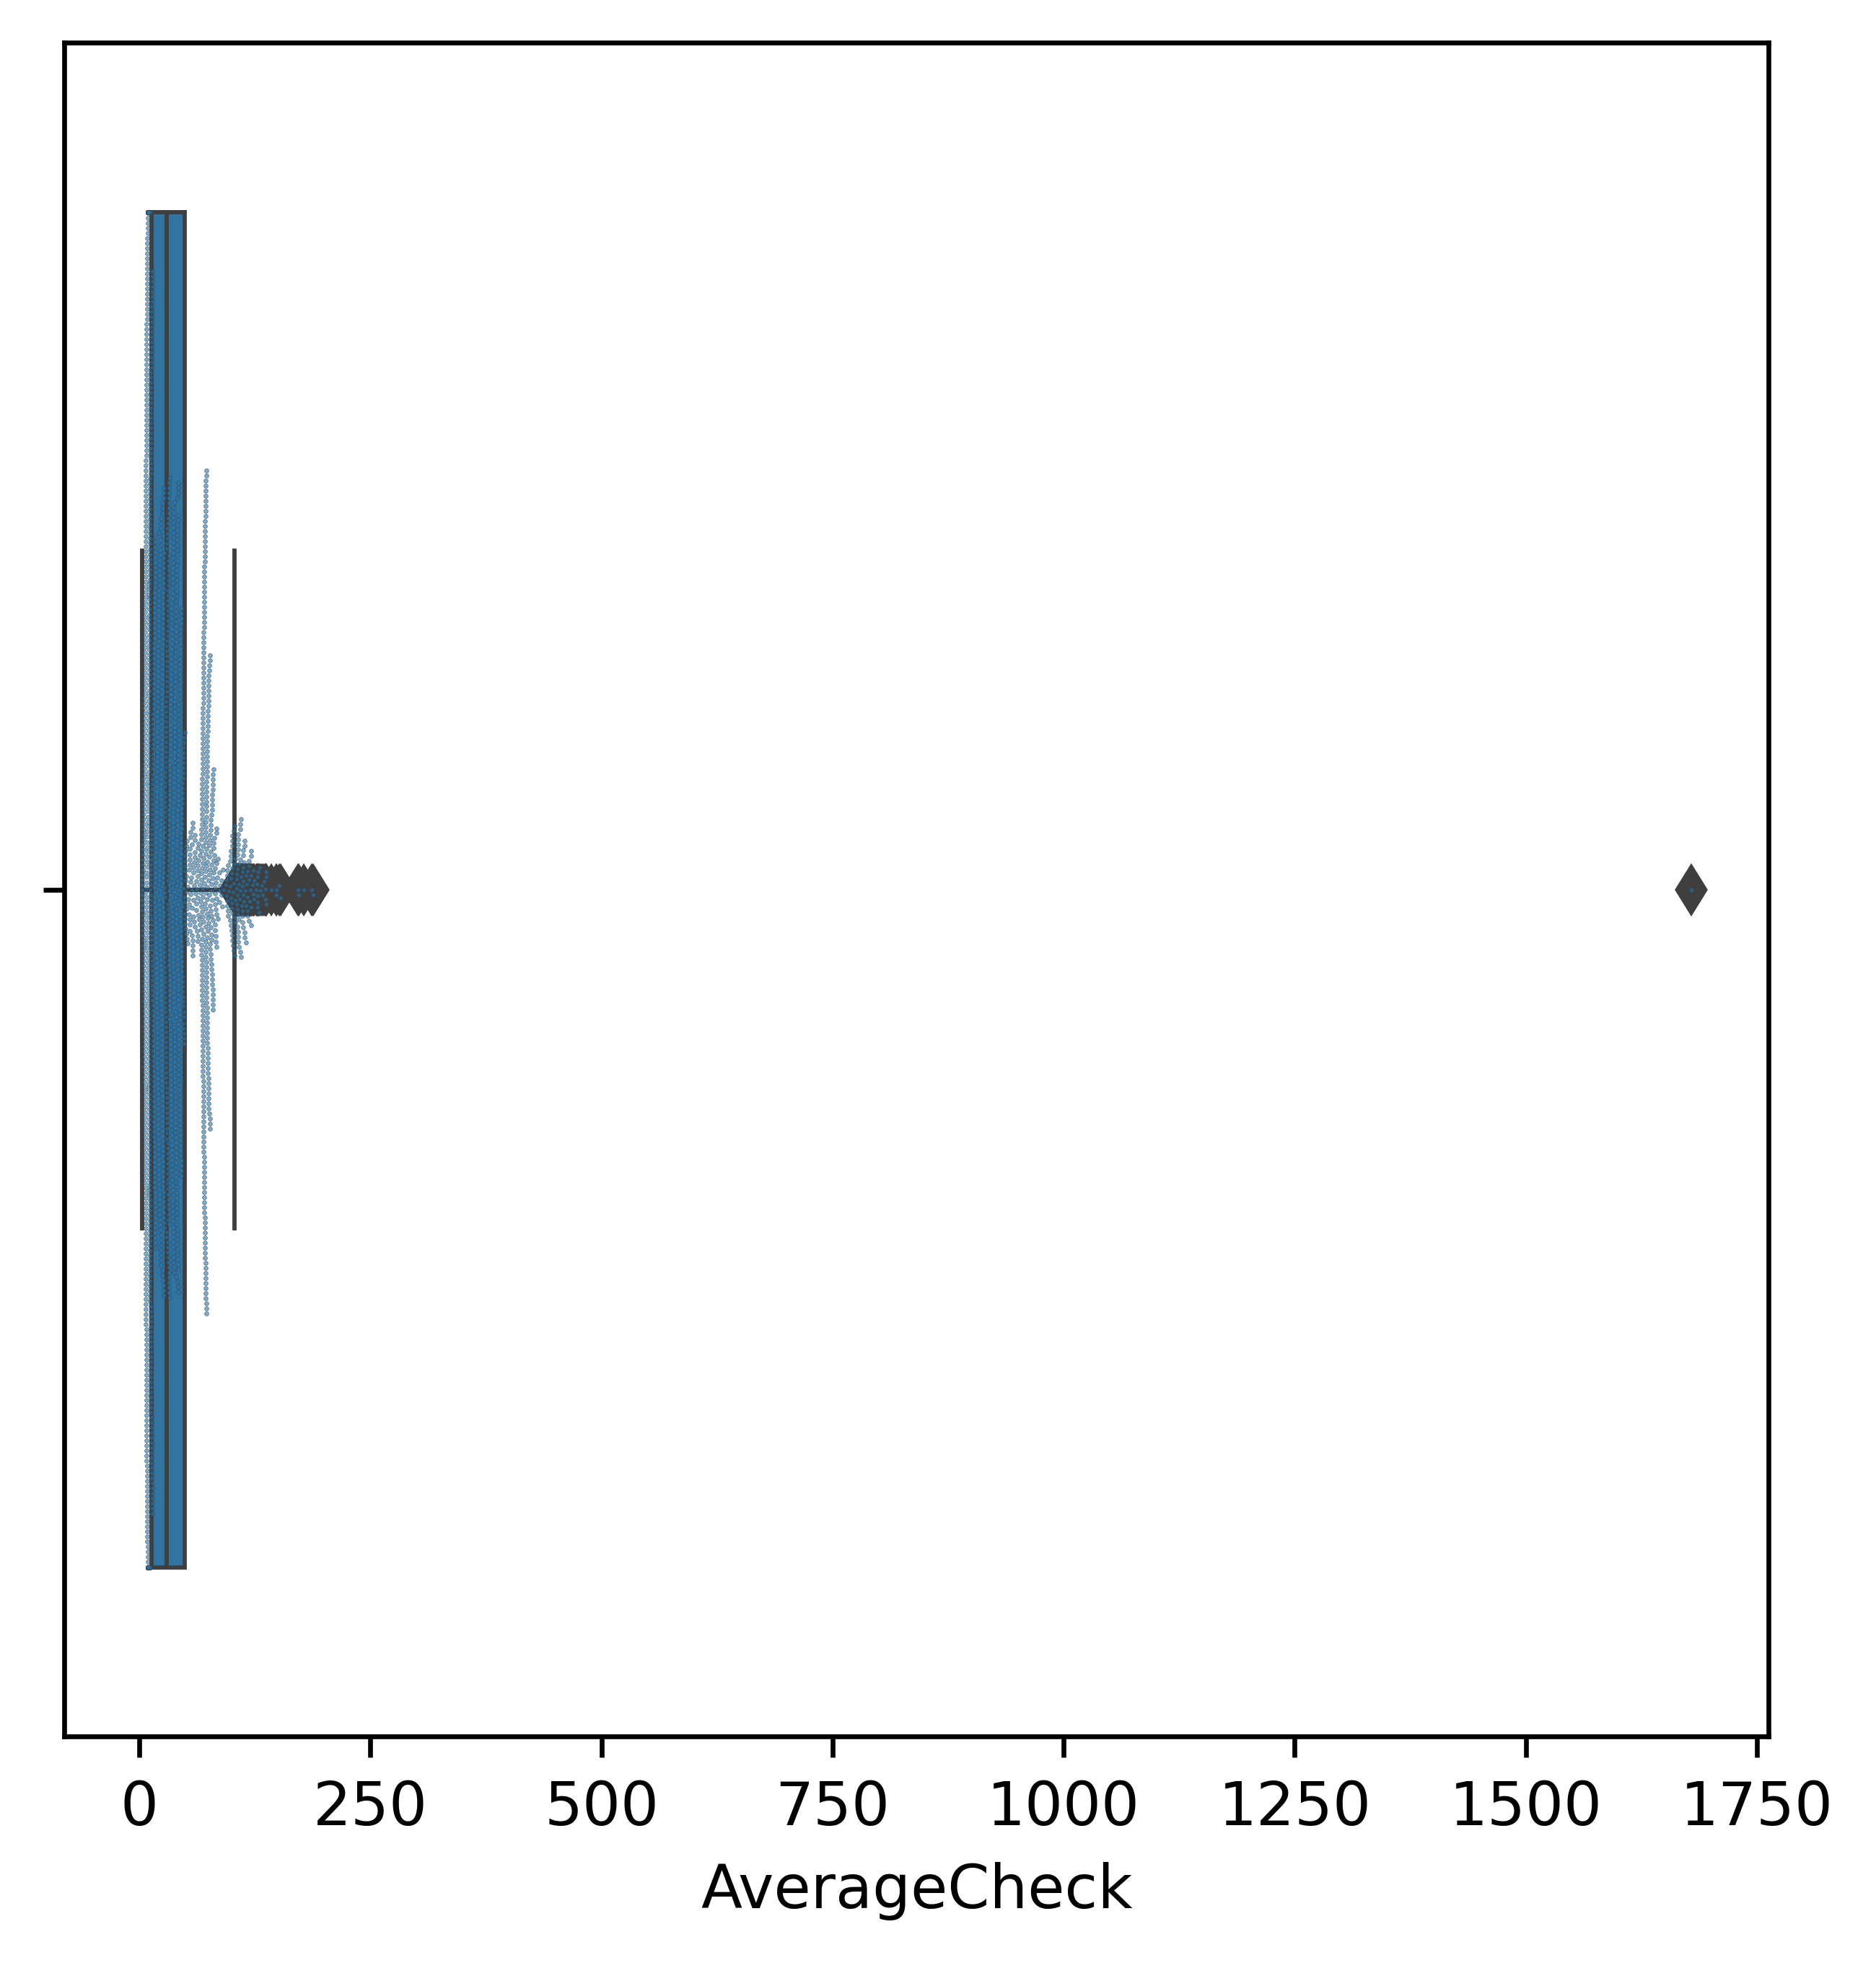

In [20]:
def setup_plot(w=2, dpi=600):
    fig, ax = plt.subplots(figsize=(w * 2.54, w * 2.54), dpi=dpi)
    return ax

# Assuming df is your dataframe and 'AverageCheck' is the column you want to plot
plot3 = sns.boxplot(x=df['AverageCheck'], ax=setup_plot(w=2, dpi=600), zorder=2, linewidth=0.7)
sns.swarmplot(x='AverageCheck', data=df, ax=plot3, size=0.7, linewidth=0.1, alpha=0.6, zorder=3)

plt.show()

In [21]:
median = df['Income'].median()
mean = df['Income'].mean()

dif = mean - median
print(f'Income Median: {round(median)}\nIncome Mean: {round(mean)}\ndifference: {round(dif)}')

df['Income'].fillna(median, inplace = True)

Income Median: 51400
Income Mean: 52242
difference: 842


In [22]:
df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)

In [23]:
df['Income'] = np.where(df['Income'] > 120000, 120000, df['Income'])
df['AverageCheck'] = np.where(df['AverageCheck'] > 200, 200, df['AverageCheck'])